In [1]:
## https://pylidc.github.io/tuts/annotation.html

In [ ]:
import pylidc as pl

ann = pl.query(pl.Annotation).first() ## um objeto pylidc.Annotation pertence a um pylidc.Scan
print(ann.scan.patient_id)

LIDC-IDRI-0078


In [28]:
anns = pl.query(pl.Annotation).filter(pl.Annotation.spiculation == 5,             ## filtrando diretamente features
                                      pl.Annotation.malignancy == 5)
print(anns.count())

91


In [5]:
print(pl.annotation_feature_names) # (some attributes are actually computed properties) // nome das caracteristicas que podem ser buscadas

('subtlety', 'internalStructure', 'calcification', 'sphericity', 'margin', 'lobulation', 'spiculation', 'texture', 'malignancy')


In [16]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 5).first() ## filtrando diagnostico maligno

print(ann.malignancy, ann.Malignancy)

print(ann.margin, ann.Margin)


5 Highly Suspicious
2 Near Poorly Defined


In [1]:
printann.scan.patient_id
ann.print_formatted_feature_table() ## tabela com todas as features do paciente

1020


In [22]:
svals = pl.query(pl.Annotation.spiculation)\
          .filter(pl.Annotation.spiculation > 3) ## possivel buscar diretamente pelos atributos, sem precisar pegar o objeto annotation

print(svals[0]) 

result = print(all([s[0] > 3 for s in svals]))

(4,)
True


In [51]:
ann = anns[0]
print(ann.malignancy, " - ",ann.Malignancy)
print(ann.scan.patient_id)

5  -  Highly Suspicious
LIDC-IDRI-0069


In [10]:
ann = pl.query(pl.Annotation).first()
contours = ann.contours

print(contours[0])

Contour(id=1,annotation_id=1)


In [11]:
print("%.2f mm, %.2f mm^2, %.2f mm^3" % (ann.diameter,           ## The diameter, surface_area, and volume attributes are all, for example, computed properties that use the contour data for a particular Annotation:
                                         ann.surface_area,
                                         ann.volume))

20.84 mm, 1124.13 mm^2, 2439.30 mm^3


In [12]:
mask = ann.boolean_mask()             ## boolean volume mask - 1 = nodulo / 0 = nao nodulo
print(mask.shape, mask.dtype) ##  methods accept a pad argument which can be used for adding context about the nodule
# => (34, 27, 6), dtype('bool')

(34, 27, 6) bool


In [4]:
bbox = ann.bbox() ## The pylidc.Annotation.bbox() method returns a tuple of slices corresponding to the nodule bounding box indices. This can be used to easily index into the NumPy CT image volume
print(bbox)

(slice(223, 271, None), slice(324, 363, None), slice(64, 72, None))


In [5]:
vol = ann.scan.to_volume()
print(vol[bbox].shape)

Loading dicom files ... This may take a moment.
(48, 39, 8)


In [15]:
print(ann.bbox_dims()) ## pra saber as dimensoes

[21.45 16.9  15.  ]


In [7]:
## visualization

import matplotlib.pyplot as plt

ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

padding = [(30,10), (10,25), (0,0)]

mask = ann.boolean_mask(pad=padding)
bbox = ann.bbox(pad=padding)

Loading dicom files ... This may take a moment.


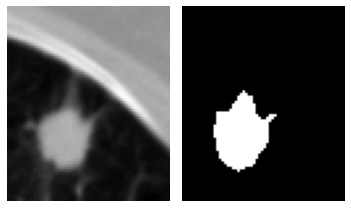

In [8]:
fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
#plt.show()


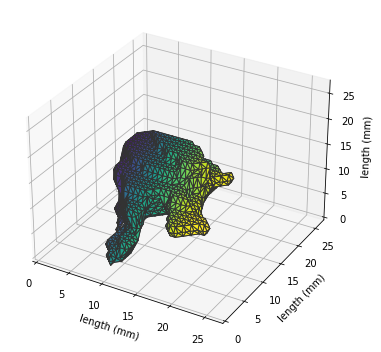

In [26]:
## o nodulo pode ser visto em 3d

ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.lobulation == 5).first()
ann.visualize_in_3d()

Loading dicom files ... This may take a moment.


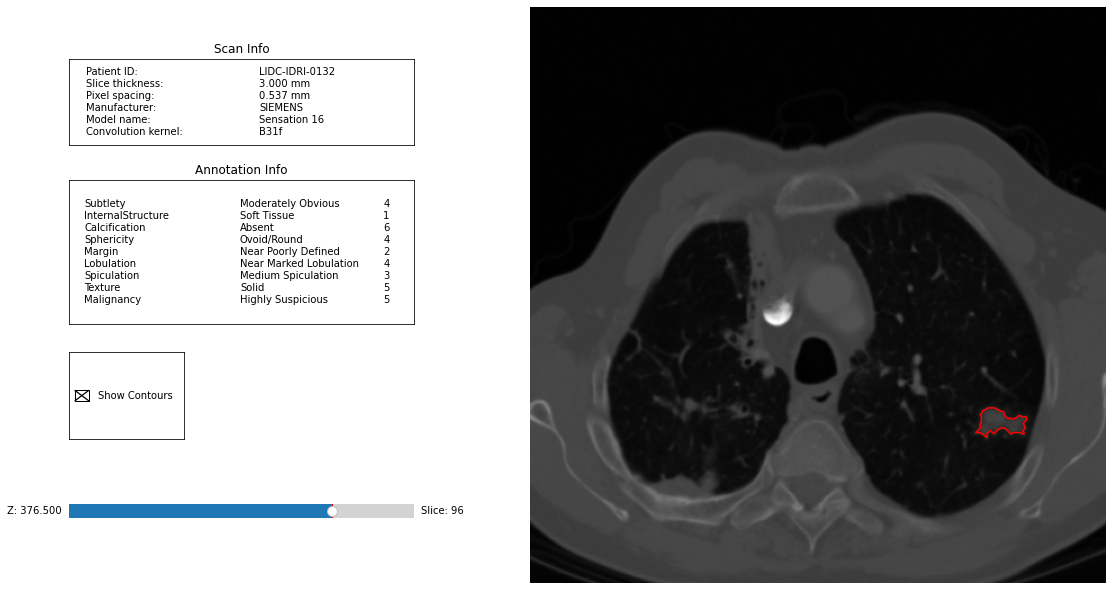

In [67]:
## pode ser visto em cima da CT

ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy==5)
ann[7].visualize_in_scan()

In [66]:
vol = ann[7].scan.to_volume()

Loading dicom files ... This may take a moment.


Loading dicom files ... This may take a moment.


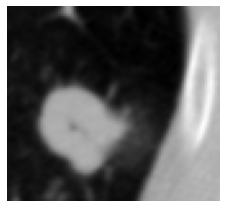

In [68]:
import matplotlib.pyplot as plt

vol = ann[7].scan.to_volume()
fig,ax = plt.subplots(1,figsize=(5,3))
padding = [(30,10), (10,25), (0,0)]
bbox = ann[7].bbox(pad=padding)
ax.imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax.axis('off')

plt.tight_layout()